In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [17]:
df = pd.read_csv("./datasets/waterbird/metadata.csv")
df.head(5)

img_id                                       img_filename  y  split  place  \
0       1  001.Black_footed_Albatross/Black_Footed_Albatr...  1      2      1   
1       2  001.Black_footed_Albatross/Black_Footed_Albatr...  1      0      1   
2       3  001.Black_footed_Albatross/Black_Footed_Albatr...  1      2      0   
3       4  001.Black_footed_Albatross/Black_Footed_Albatr...  1      0      1   
4       5  001.Black_footed_Albatross/Black_Footed_Albatr...  1      0      1   

                  place_filename  
0          /o/ocean/00002178.jpg  
1   /l/lake/natural/00000065.jpg  
2  /b/bamboo_forest/00000131.jpg  
3          /o/ocean/00001268.jpg  
4          /o/ocean/00003147.jpg

In [18]:
LANDBIRD = 0
WATERBIRD = 1
LAND = 0
WATER = 1

In [19]:
train_df = df[df['split'] == 0]
val_df = df[df['split'] == 1]
test_df = df[df['split'] == 2]

len(train_df), len(test_df), len(val_df)

(4795, 5794, 1199)

## Plot random images from dataset

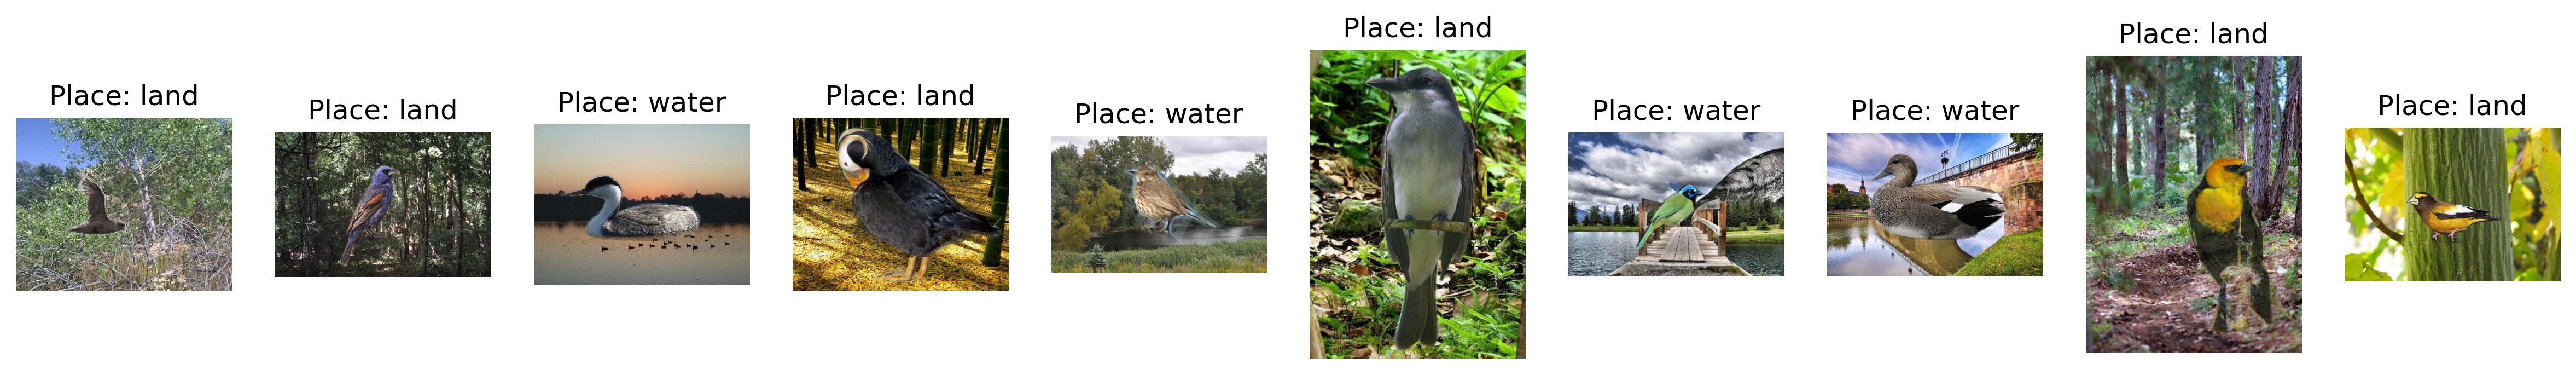

In [20]:
n_images = 10
idx = np.random.randint(0, len(df), n_images)
img_paths, places = list(df.iloc[idx]['img_filename']), list(
    df.iloc[idx]['place'])

fig, axes = plt.subplots(1, n_images, figsize=(20, 5), dpi=300)
for img_path, place, ax in zip(img_paths, places, axes):
    img_path = os.path.join("./datasets/waterbird", img_path)
    img = Image.open(img_path)
    place = "land" if place == 0 else "water"
    ax.imshow(img)
    ax.set_title(f'Place: {place}')
    ax.axis("off")

plt.show()

## Statistics

In [21]:
num_landbird = df[df['y'] == LANDBIRD].shape[0]
num_waterbird = df[df['y'] == WATERBIRD].shape[0]
land_bird_on_land = df[(df['place'] == LAND) & (df['y'] == LANDBIRD)].shape[0]
waterbird_on_water = df[(df['place'] == WATER) & (df['y'] == WATERBIRD)].shape[0]
land_bird_on_water = df[(df['place'] == WATER) & (df['y'] == LANDBIRD)].shape[0]
water_bird_on_land = df[(df['place'] == LAND) &(df['y'] == WATERBIRD)].shape[0]

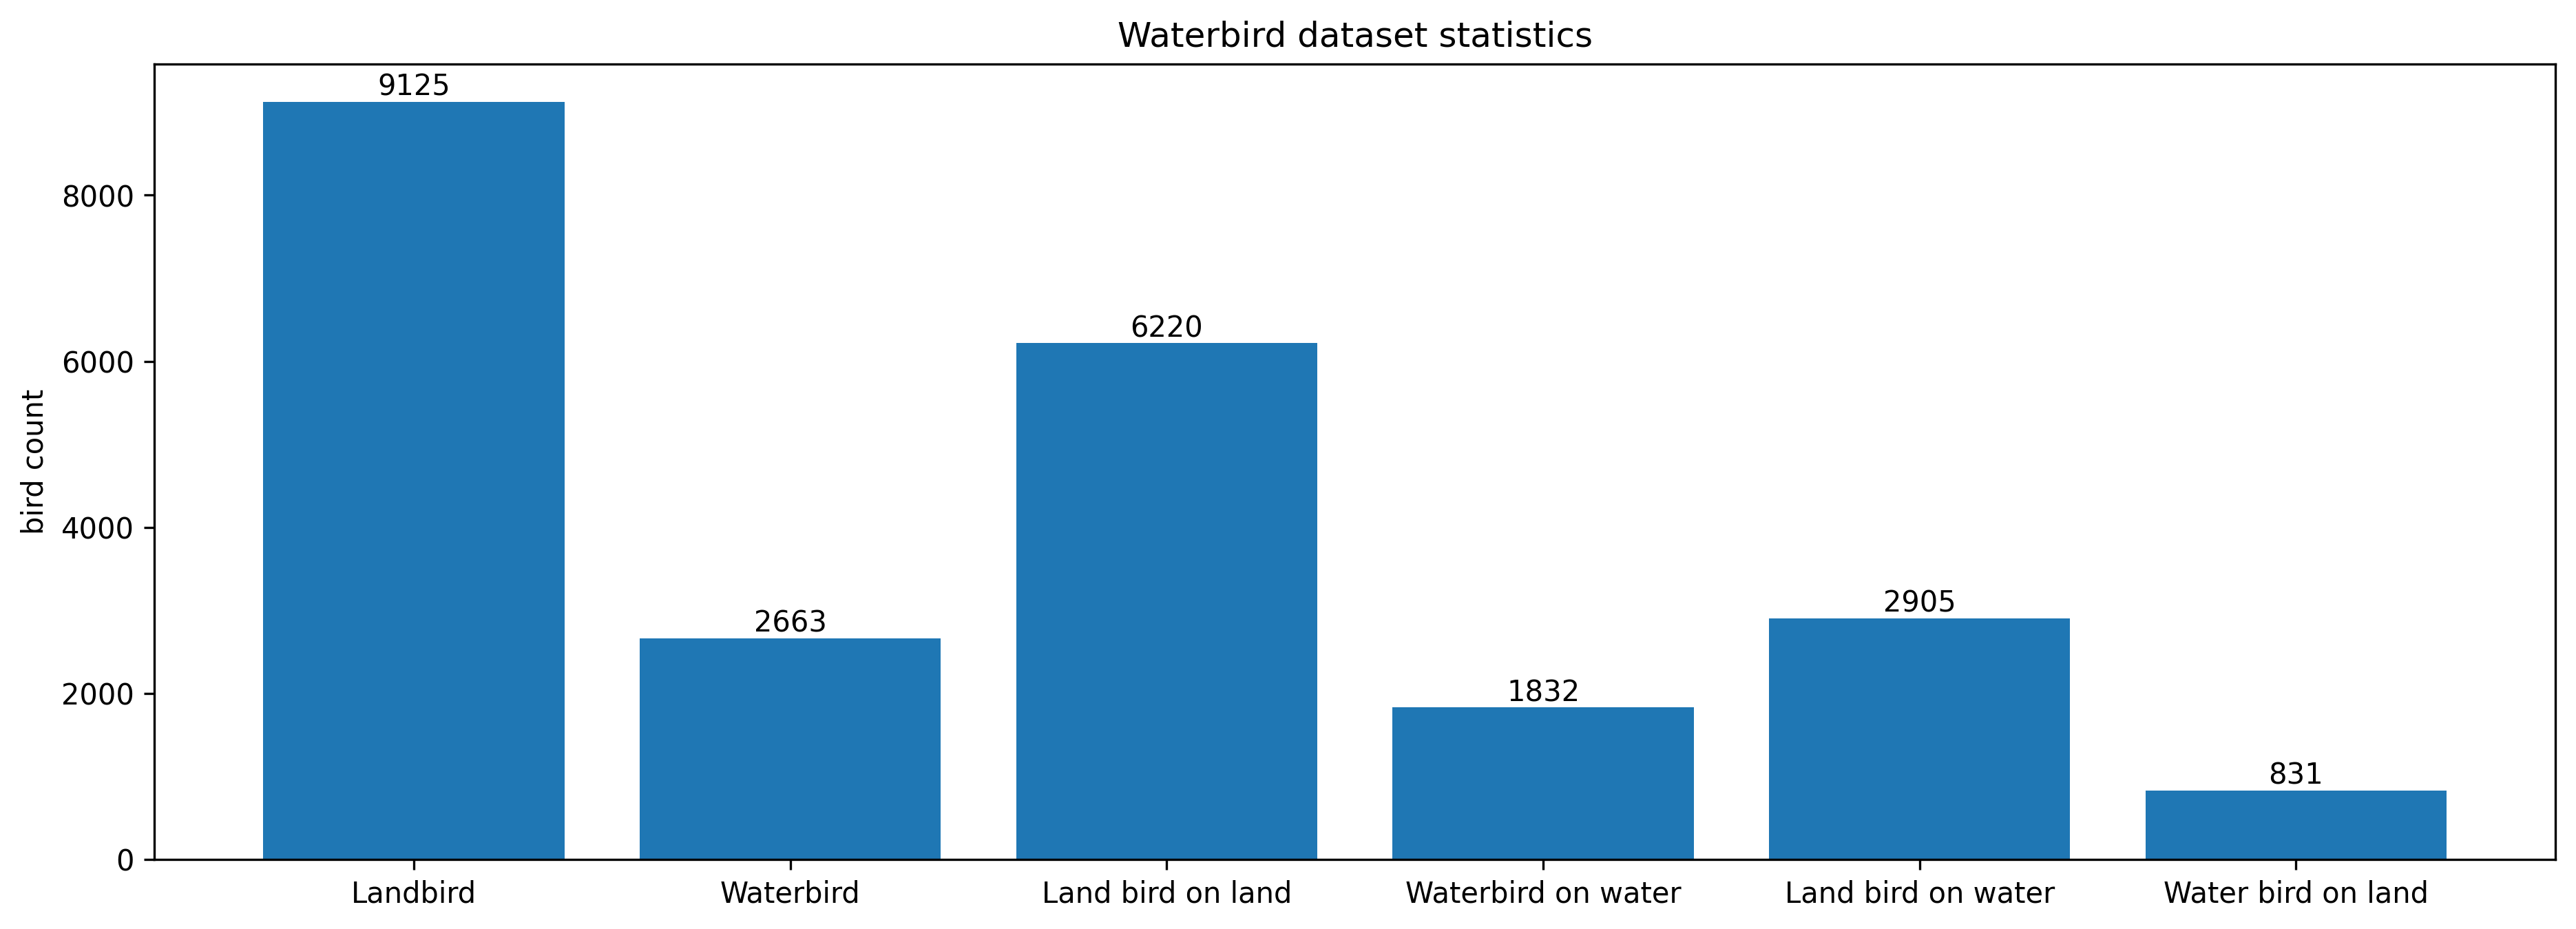

In [22]:
# fig, ax = plt.subplots()

birds_count = ['Landbird', 'Waterbird',
               'Land bird on land', 'Waterbird on water', 'Land bird on water', 'Water bird on land']
counts = [num_landbird, num_waterbird,
          land_bird_on_land, waterbird_on_water, land_bird_on_water, water_bird_on_land]

plt.figure(figsize=(15, 5), dpi=300)
bars = plt.bar(birds_count, counts)
plt.ylabel("bird count")
plt.title('Waterbird dataset statistics')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval +
             0.5, int(yval), ha='center', va='bottom')
plt.show()

In [26]:
def show_statistics(title:str, split=0):
    land_bird_on_land = df[(df['place'] == LAND) & (df['y'] == LANDBIRD) & (df['split'] == split)].shape[0]
    waterbird_on_water = df[(df['place'] == WATER) &
                            (df['y'] == WATERBIRD) & (df['split'] == split)].shape[0]
    land_bird_on_water = df[(df['place'] == WATER) &
                            (df['y'] == LANDBIRD) & (df['split'] == split)].shape[0]
    water_bird_on_land = df[(df['place'] == LAND) & (
        df['y'] == WATERBIRD) & (df['split'] == split)].shape[0]
    
    birds_count = ['Land bird on land', 'Waterbird on water', 'Land bird on water', 'Water bird on land']

    counts = [land_bird_on_land, waterbird_on_water, land_bird_on_water, water_bird_on_land]

    plt.figure(figsize=(15, 5), dpi=300)
    bars = plt.bar(birds_count, counts)
    plt.ylabel("bird count")
    plt.title(title)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval +
                0.5, int(yval), ha='center', va='bottom')

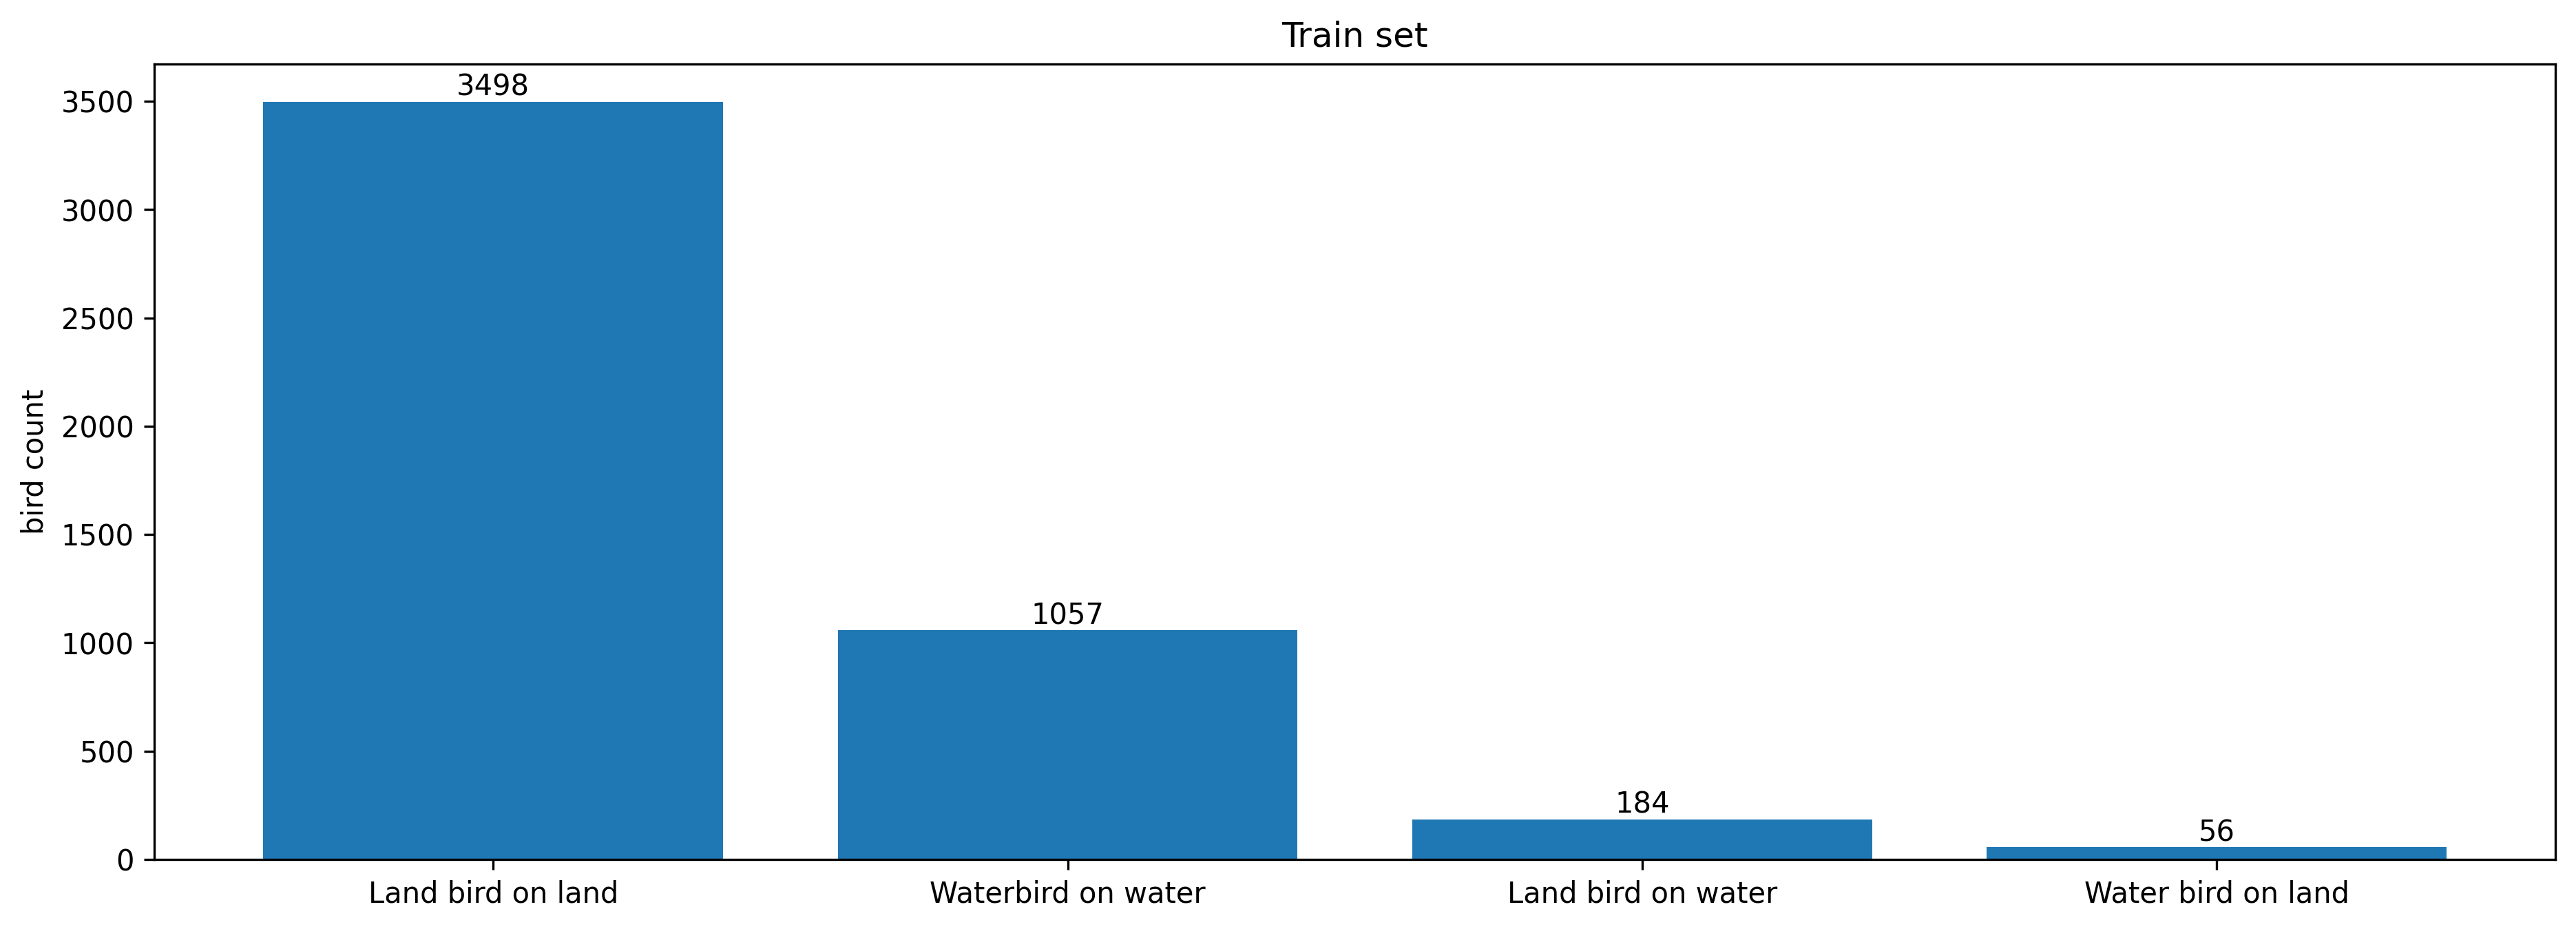

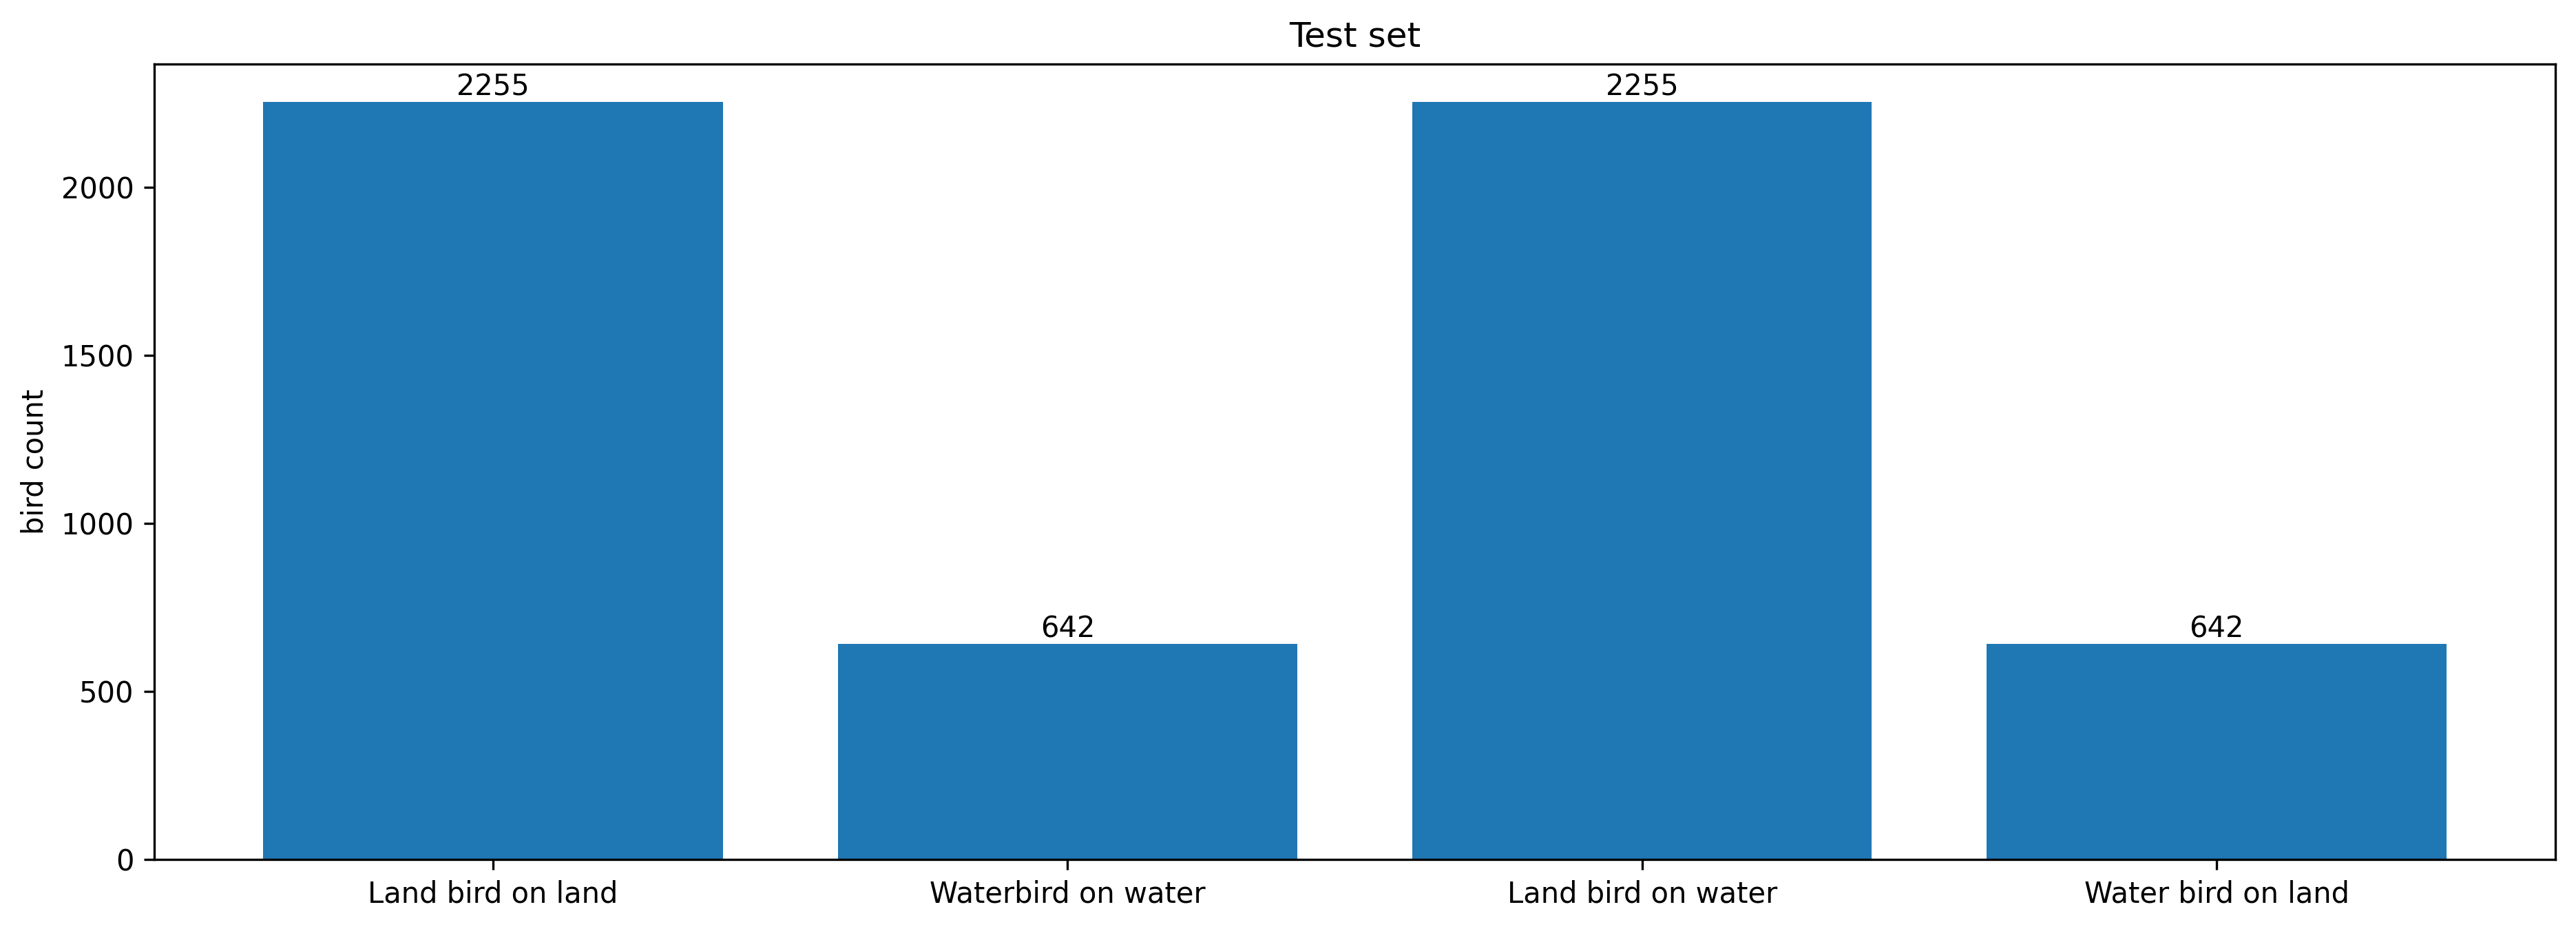

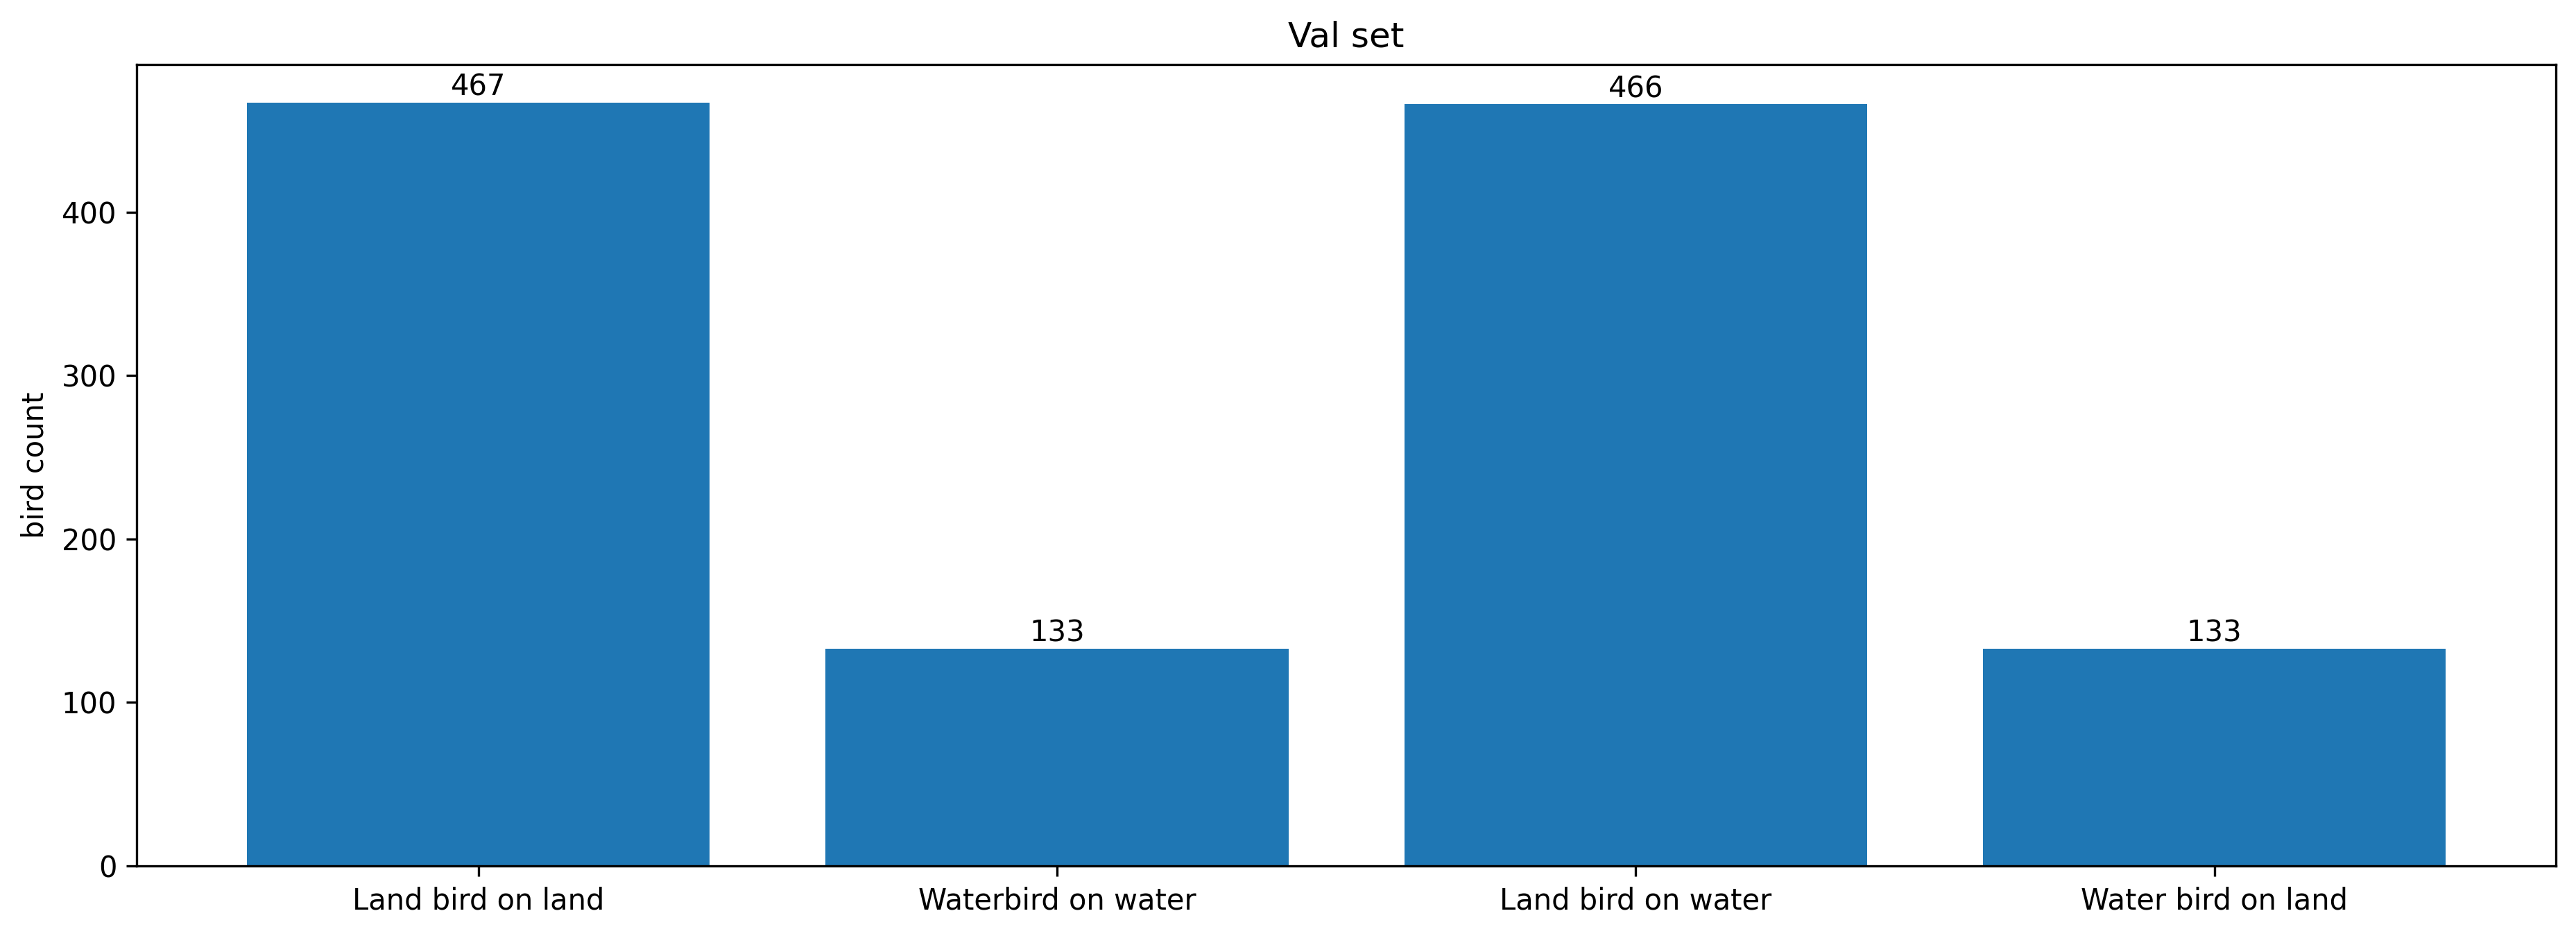

In [28]:
train_split = 0 # train
val_split = 1 # val
test_split = 2 # test

show_statistics(split=train_split, title="Train set")
show_statistics(split=test_split, title="Test set")
show_statistics(split=val_split, title="Val set")

In [79]:
true_labels = np.load("../../Download/Waterbird/waterbird_or_landbird/true_labels.npy")
predicted_labels = np.load("../../Download/Waterbird/waterbird_or_landbird/predicted_labels.npy")
place = np.load("../../Download/Waterbird/waterbird_or_landbird/places.npy")

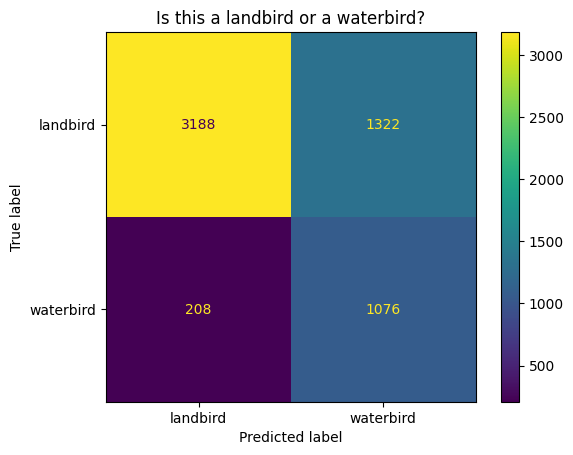

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(true_labels, predicted_labels)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["landbird", "waterbird"])
cm_display.plot()
plt.title('Is this a landbird or a waterbird?')
plt.savefig('./matrix.png')
plt.show()

In [81]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

    landbird       0.94      0.71      0.81      4510
   waterbird       0.45      0.84      0.58      1284

    accuracy                           0.74      5794
   macro avg       0.69      0.77      0.70      5794
weighted avg       0.83      0.74      0.76      5794



In [82]:
true = np.array([LANDBIRD if x == 'landbird' else WATERBIRD for x in true_labels])
predicted = np.array([LANDBIRD if x == 'landbird' else WATERBIRD for x in predicted_labels])

In [83]:
landbird_on_land = []
landbird_on_water = []
waterbird_on_land = []
waterbird_on_water = []

predicted_landbird_on_land = []
predicted_landbird_on_water = []
predicted_waterbird_on_land = []
predicted_waterbird_on_water = []

for i in range(len(true)):
    if true[i] == LANDBIRD and place[i] == LAND:
        landbird_on_land.append(true[i])
        predicted_landbird_on_land.append(predicted[i])

    elif true[i] == LANDBIRD and place[i] == WATER:
        landbird_on_water.append(true[i])
        predicted_landbird_on_water.append(predicted[i])

    elif true[i] == WATERBIRD and place[i] == LAND:
        waterbird_on_land.append(true[i])
        predicted_waterbird_on_land.append(predicted[i])

    elif true[i] == WATERBIRD and place[i] == WATER:
        waterbird_on_water.append(true[i])
        predicted_waterbird_on_water.append(predicted[i])
    
len(waterbird_on_land), len(waterbird_on_water), len(
    landbird_on_land), len(landbird_on_water)

(642, 642, 2255, 2255)

In [84]:
def groupwise_stattistics(y, y_pred):
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=True)
    recall = recall_score(y, y_pred, zero_division=True)
    f1 = f1_score(y, y_pred, zero_division=True)
    return accuracy, precision, recall, f1

In [85]:
print('Land bird on land')
print(classification_report(landbird_on_land, predicted_landbird_on_land, zero_division=True))

print('Land bird on water')
print(classification_report(landbird_on_water, predicted_landbird_on_water, zero_division=True))

print('Water bird on land')
print(classification_report(waterbird_on_land, predicted_waterbird_on_land, zero_division=True))

print('Water bird on water')
print(classification_report(waterbird_on_water, predicted_waterbird_on_water, zero_division=True))

Land bird on land
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2255
           1       0.00      1.00      0.00         0

    accuracy                           0.94      2255
   macro avg       0.50      0.97      0.48      2255
weighted avg       1.00      0.94      0.97      2255

Land bird on water
              precision    recall  f1-score   support

           0       1.00      0.47      0.64      2255
           1       0.00      1.00      0.00         0

    accuracy                           0.47      2255
   macro avg       0.50      0.74      0.32      2255
weighted avg       1.00      0.47      0.64      2255

Water bird on land
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.72      0.84       642

    accuracy                           0.72       642
   macro avg       0.50      0.86      0.42       642
weighted avg      